<a href="https://colab.research.google.com/github/AdithyaV7/AstroTales/blob/main/StoryGeneration_and_ImageGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai==0.28
import openai
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 547.4 kB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-a6ugwnxc
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-a6ugwnxc
  Resolved https://github.com/huggingface/diffusers to commit 5915c2985db162278e09196160d796166c89ad12
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.28.0.dev0-py3-none-any.whl size=2097697 sha256=34ad5f5665a5d74a6ff2bc2af497649445bc3b73e81570fec52d303b3da8987f
  Stored in directory: /tmp/pip-ephem-wheel-cache-hw1vmlgg/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64

In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
openai.api_key = "<key>"

fine_tuned_model_id ='ft:gpt-3.5-turbo-0125:personal:astrotale:9CXF5nl2'
image_prompt_model_id ='gpt-4-turbo'

In [ ]:
#fine_tuned_model_id = 'ft:gpt-3.5-turbo-0125:personal:astrotale:9CXF5nl2'
system_message ='You are Kara. You are a creative Storyteller who writes stories that including astronomy facts. You write very creative and interesting short stories in a very conversational way that keeps the audience engaged. Your target audience is preteens'
test_messages = [{"role": "system", "content": system_message}]

def get_assistant_response(user_message):

  test_messages.append({"role": "user", "content": user_message})


  response = openai.ChatCompletion.create(
      model=fine_tuned_model_id,
      messages=test_messages,
      temperature=0.5,
      max_tokens=500
  )
  test_messages.append({"role": "assistant", "content": response["choices"][0]["message"]["content"]})
  #print(test_messages)

  return response["choices"][0]["message"]["content"]

user_message='Yes'

while user_message != 'Quit':
  user_message = input("You: ")
  assistant_response = get_assistant_response(user_message)

  print("Assistant:", assistant_response)

You: hi
Assistant: Hi, Welcome to AstroTales! I’m Kara. Would you like to read a story?
You: yes
Assistant: Excellent! , Are there any movie or cartoon characters you like?
You: no
Assistant: That’s fine. I have a great story for you. Here we go, Once upon a time, in a bustling city, lived a young boy named Alex. Unlike other kids who spent their time playing video games, Alex was a curious boy who loved to read about space and the wonders of the universe. One day, while flipping through a dusty library book, he stumbled upon a fascinating fact - the Sun was actually a star! 

This simple fact blew Alex's mind. He couldn't believe that the bright, warm object he saw every day was the same as the twinkling lights in the night sky. From that moment on, Alex was obsessed with stars. He spent hours gazing at the night sky, imagining himself traveling through the cosmos. 

Years passed, and Alex grew into a knowledgeable young astronomer. He devoured books on the subject and built his own t

In [ ]:
print(test_messages)

[{'role': 'system', 'content': 'You are Kara. You are a creative Storyteller who writes stories that including astronomy facts. You write very creative and interesting short stories in a very conversational way that keeps the audience engaged. Your target audience is preteens'}, {'role': 'user', 'content': 'hi'}, {'role': 'assistant', 'content': 'Hi, Welcome to AstroTales! I’m Kara. Would you like to read a story?'}, {'role': 'user', 'content': 'yes'}, {'role': 'assistant', 'content': 'Excellent! , Are there any movie or cartoon characters you like?'}, {'role': 'user', 'content': 'no'}, {'role': 'assistant', 'content': 'That’s fine. I have a great story for you. Here we go, Once upon a time, in a bustling city, lived a young boy named Alex. Unlike other kids who spent their time playing video games, Alex was a curious boy who loved to read about space and the wonders of the universe. One day, while flipping through a dusty library book, he stumbled upon a fascinating fact - the Sun was

In [ ]:
data = test_messages

# Extracting the 3rd 'assistant' content
story_content = data[6]['content']

print(story_content)

That’s fine. I have a great story for you. Here we go, Once upon a time, in a bustling city, lived a young boy named Alex. Unlike other kids who spent their time playing video games, Alex was a curious boy who loved to read about space and the wonders of the universe. One day, while flipping through a dusty library book, he stumbled upon a fascinating fact - the Sun was actually a star! 

This simple fact blew Alex's mind. He couldn't believe that the bright, warm object he saw every day was the same as the twinkling lights in the night sky. From that moment on, Alex was obsessed with stars. He spent hours gazing at the night sky, imagining himself traveling through the cosmos. 

Years passed, and Alex grew into a knowledgeable young astronomer. He devoured books on the subject and built his own telescope using a discarded magnifying glass. With each passing day, his passion for space grew stronger. 

One evening, while attending a science fair, Alex stumbled upon a peculiar machine. T

In [ ]:
first_150_words = ' '.join(story_content.split()[:200])
print(first_150_words)

That’s fine. I have a great story for you. Here we go, Once upon a time, in a bustling city, lived a young boy named Alex. Unlike other kids who spent their time playing video games, Alex was a curious boy who loved to read about space and the wonders of the universe. One day, while flipping through a dusty library book, he stumbled upon a fascinating fact - the Sun was actually a star! This simple fact blew Alex's mind. He couldn't believe that the bright, warm object he saw every day was the same as the twinkling lights in the night sky. From that moment on, Alex was obsessed with stars. He spent hours gazing at the night sky, imagining himself traveling through the cosmos. Years passed, and Alex grew into a knowledgeable young astronomer. He devoured books on the subject and built his own telescope using a discarded magnifying glass. With each passing day, his passion for space grew stronger. One evening, while attending a science fair, Alex stumbled upon a peculiar machine. The sig

................................................. IMAGE GENERATION ............................................

In [ ]:
system_message ='You summarize the long paragraphs and generate a prompt that describes characters in that paragraph and a background that suitable for image generation Follow the below template: (cartoon style, <Characters description>, <background description>, high quality)'
test_messages = [{"role": "system", "content": system_message}]

def get_assistant_response(user_message):

  test_messages.append({"role": "user", "content": user_message})


  response = openai.ChatCompletion.create(
      model=image_prompt_model_id,
      messages=test_messages,
      temperature=0.5,
      max_tokens=70
  )

  #print(test_messages)
  prompt_text = response["choices"][0]["message"]["content"]

  return response["choices"][0]["message"]["content"]

In [ ]:
text1 = get_assistant_response(first_150_words)
print(text1)

(cartoon style, a young boy with short brown hair and glasses, wearing a sweater and jeans, holding a book about stars, <a bustling city library with shelves filled with books and a large window showing a starry night sky>, high quality)


In [ ]:
get_assistant_response
prompt = f"{text1}"  # Your prompt here
neg_prompt = "ugly, blurry, poor quality, nude" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

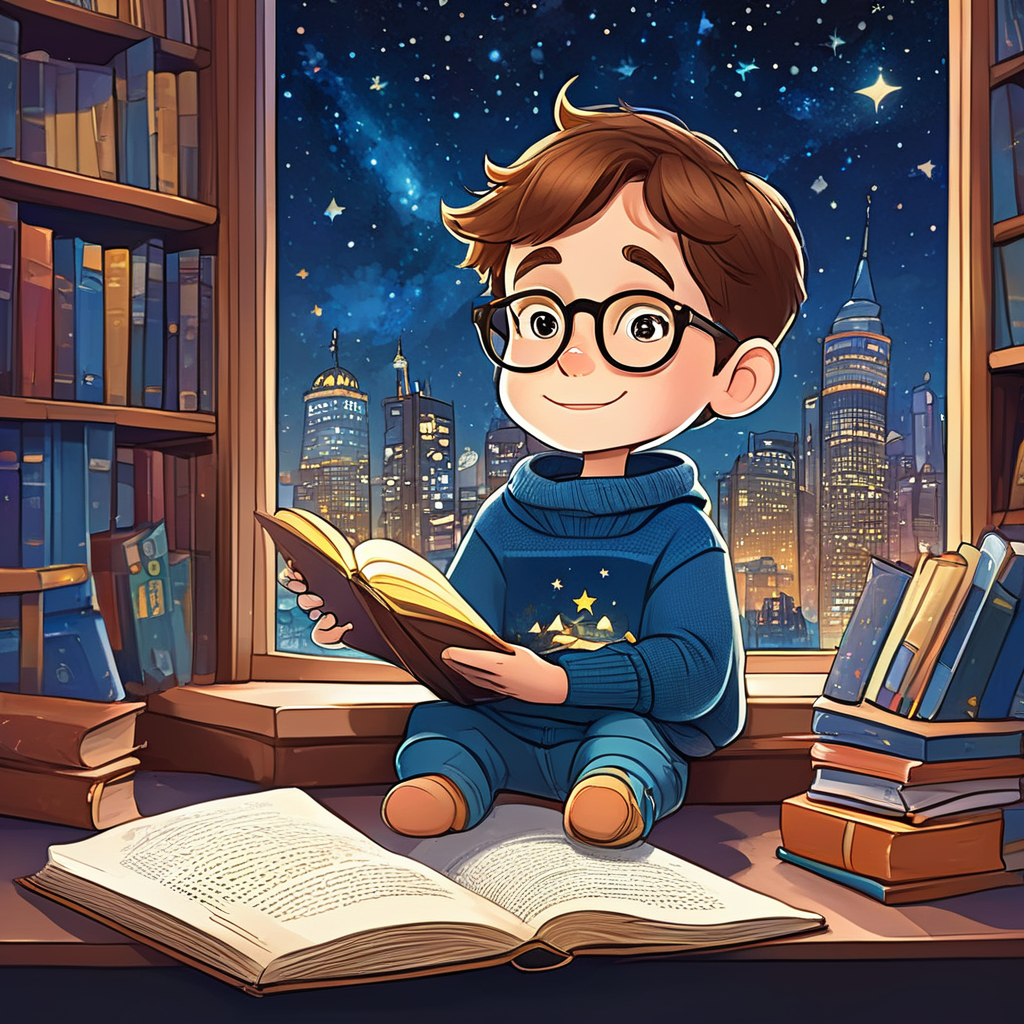

In [ ]:
image